In [1]:
%load_ext autoreload
%autoreload 2

# Issue with ammonia-aqua properties

On 2017-09-20, I'm noticing a problem with the reflux stream class. It comes up with non-monotonic (T,q) curve. I suspect that the property lookups are not well-behaved, that is, they are not monotonic.

In [2]:
from ammonia_props import convert_state_list_to_array, CStateTable
import ammonia1
import system_aqua1
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xC = np.array([0.51284472, 277.97717012, 312.16427764, 313.6952877,
               310.24856734, 374.14020482])
ch = system_aqua1.makeChiller(xC)

In [43]:
ch.getRectifierStream()


====================Rectifier debug info====================
vapor_inlet (gen_vapor_outlet) =  State(T=351.9344380231556, P=15.139624377424653, x=0.9881288434190637, h=1424.61045386996, s=4.574749842640767, u=1268.729121159115, v=0.10296248362891122, Qu=1.0)
liquid_outlet (gen_reflux_inlet) =  State(T=351.9344380231556, P=15.139624377424653, x=0.5118797468777768, h=118.42029741010825, s=0.9705886173277942, u=116.44515361513855, v=0.0013046187578569727, Qu=0.0)
m_net, x_net =  0.0993943080368 0.999869
  x vapor    x liquid    T vapor    T liquid    h vapor    h liquid       q (kW)
---------  ----------  ---------  ----------  ---------  ----------  -----------
 0.999869    0.959099    313.652     313.652    1294.6     163.116   -16.1228
 0.999629    0.880904    316.455     316.455    1297.34    119.032   -15.614
 0.99939     0.819957    319.163     319.163    1299.67     89.6041  -15.2974
 0.99915     0.775868    321.679     321.679    1301.61     73.4354  -15.0334
 0.998911    0.742319

ValueError: `x` must be strictly increasing or decreasing.

The error occurs in the vapor phase enthalpy around a temperature of 347 K. Maybe we can zoom in on that. Using functions of (P, T, Qu):

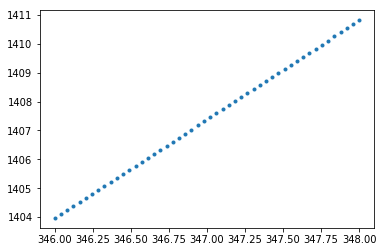

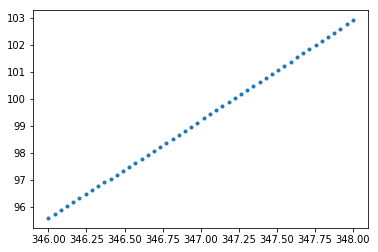

In [71]:
P=ch.gen_vapor_outlet.P
x=ch.gen_vapor_outlet.x
vap, liq = [], []
a_T = np.linspace(346.,348.)
#a_T = np.linspace(300.,400.)
for T in a_T:
    vap.append(ammonia1.amm.props2(P=P, T=T, Qu=1))
    liq.append(ammonia1.amm.props2(P=P, T=T, Qu=0))
a_vap = convert_state_list_to_array(vap)
a_liq = convert_state_list_to_array(liq)
#display(CStateTable(a_vap))
plt.figure(1)
plt.plot(a_T, a_vap['h'],'.')
plt.figure(2)
plt.plot(a_T, a_liq['h'],'.')
plt.show()

That shows no problems - ie, the curves are monotonic. Perhaps the problem is with the inputs to the property functions. The code uses `AmmoniaProps.equilibriumStates2`, which in turn calls `props2` first for the vapor properties with inputs (P, x, Qu), and then for the liquid properties with inputs (P, T, Qu).

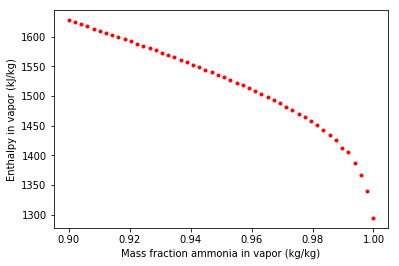

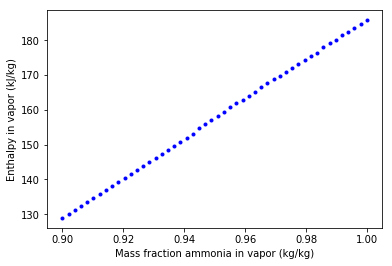

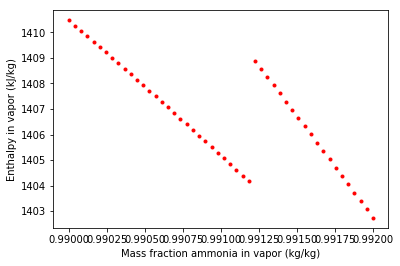

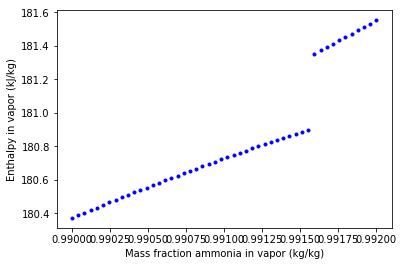

,T,P,x,h,s,u,v,Qu
,349.234,15.1396,0.99,1410.48,4.53406,1257.02,0.101363,1
,349.174,15.1396,0.990041,1410.27,4.53346,1256.84,0.101339,1
,349.114,15.1396,0.990082,1410.06,4.53285,1256.67,0.101314,1
,349.053,15.1396,0.990122,1409.85,4.53224,1256.5,0.10129,1
,348.992,15.1396,0.990163,1409.64,4.53163,1256.32,0.101265,1
,348.931,15.1396,0.990204,1409.42,4.53102,1256.15,0.101241,1
,348.87,15.1396,0.990245,1409.21,4.5304,1255.98,0.101216,1
,348.808,15.1396,0.990286,1409,4.52979,1255.8,0.101191,1
,348.746,15.1396,0.990327,1408.79,4.52917,1255.63,0.101166,1
,348.685,15.1396,0.990367,1408.57,4.52855,1255.45,0.101141,1


In [74]:
P=ch.gen_vapor_outlet.P
a_x_wide = np.linspace(0.9, 0.9999)
a_x_narrow = np.linspace(0.990, 0.992)
for a_x in (a_x_wide, a_x_narrow):
    vap, liq = [], []
    for x in a_x:
        vap.append(ammonia1.amm.props2(P=P, x=x, Qu=1))
        liq.append(ammonia1.amm.props2(P=P, x=x, Qu=0))
    a_vap = convert_state_list_to_array(vap)
    a_liq = convert_state_list_to_array(liq)
    plt.figure()
    plt.plot(a_x, a_vap['h'],'r.')
    plt.xlabel("Mass fraction ammonia in vapor (kg/kg)")
    plt.ylabel("Enthalpy in vapor (kJ/kg)")
    plt.figure()
    plt.plot(a_x, a_liq['h'],'b.')
    plt.xlabel("Mass fraction ammonia in vapor (kg/kg)")
    plt.ylabel("Enthalpy in vapor (kJ/kg)")
plt.show()

display(CStateTable(a_vap))

From what I observe, I would guess that there is a transition between fitting functions that was not smoothed. Another possibility for a discrepancy is that the (P, x, Qu) inputs require an iterative solve with different inputs, but that would not explain this jump. We probably ought to apply some smoothing or use a different set of inputs. Argh.

After making some changes, here is the output for the same test case:

In [20]:
rs = ch.getRectifierStream()
rs

C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


No error means the inerpolation was successfully performed.